#### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing datasets

train_df = pd.read_csv(r"F:\mal datasets\titanic_com\train.csv")
test_df = pd.read_csv(r"F:\mal datasets\titanic_com\test.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### Plotting missing values for training and testing dataset

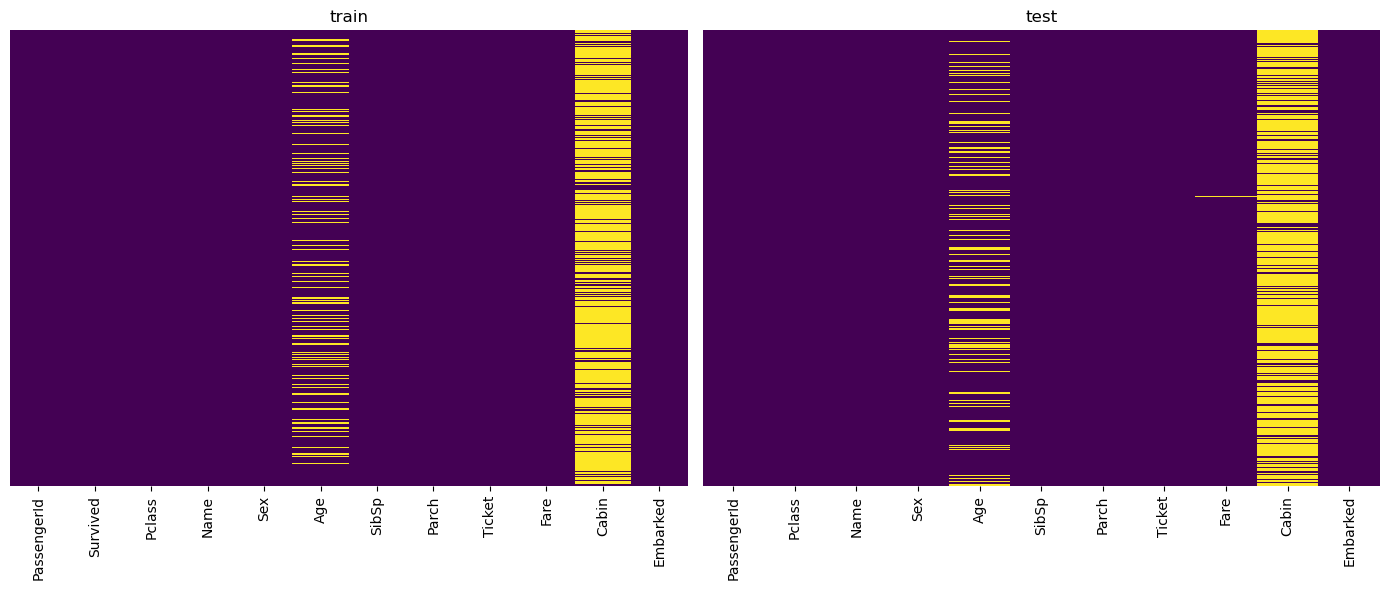

In [8]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1) #number of (rows, colums, position of this plot)
sns.heatmap(train_df.isnull(), cmap="viridis", cbar=False,yticklabels=False)
plt.title("train")

plt.subplot(1,2,2) 
sns.heatmap(test_df.isnull(), cmap="viridis", cbar=False,yticklabels=False)
plt.title("test")

plt.tight_layout()
plt.show()

In [9]:
# merging two datasets
df1 = train_df.drop(columns="Survived") #dropped the survived column to match with the test dataset
df = pd.concat([df1,test_df], ignore_index=True)

In [10]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df["HasCabin"] = df["Cabin"].notnull().astype(int)

In [12]:
#cabin has a lot of missing values. its better to drop that column
df = df.drop(columns="Cabin")

In [13]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
FamilySize       0
IsAlone          0
HasCabin         0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

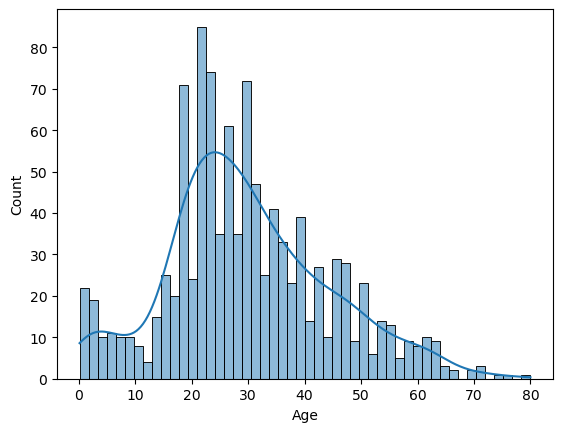

In [14]:
sns.histplot(df['Age'].dropna(),bins= 50, kde= True)

<Axes: xlabel='Age', ylabel='Fare'>

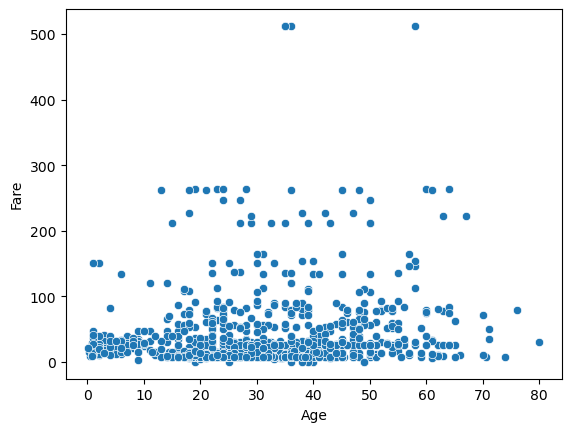

In [15]:
sns.scatterplot(data=df, x='Age', y='Fare')

In [16]:
df.groupby('Parch')["Age"].mean()

Parch
0    31.969401
1    24.965625
2    18.975979
3    38.875000
4    47.600000
5    39.333333
6    41.500000
9          NaN
Name: Age, dtype: float64

In [17]:
df.groupby('Sex')["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [18]:
df.groupby("Pclass")['Age'].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

### Updating age according to name

In [19]:
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()

df["Title"] = df["Title"].replace(
    ["Mlle", "Ms"], "Miss"
)
df["Title"] = df["Title"].replace(
    ["Mme"], "Mrs"
)
df["Title"] = df["Title"].replace(
    ["Dr","Major","Col","Rev","Capt","Sir","Don","Jonkheer","Lady","Countess","the Countess","Dona"], "Rare"
)

In [20]:
df.groupby('Title')["Age"].mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.252151
Mrs       36.918129
Rare      45.178571
Name: Age, dtype: float64

In [21]:
df["Age"] = df.apply(lambda x:
                5.5 if pd.isnull(x["Age"]) and x["Title"] == "Master"
                else 22 if pd.isnull(x["Age"]) and x["Title"] == "Miss"
                else 32 if pd.isnull(x["Age"]) and x["Title"] == "Mr"
                else 37 if pd.isnull(x["Age"]) and x["Title"] == "Mrs"
                else 45 if pd.isnull(x["Age"]) and x["Title"] == "Rare"
                else x["Age"],
                
            axis=1

                )

<Axes: >

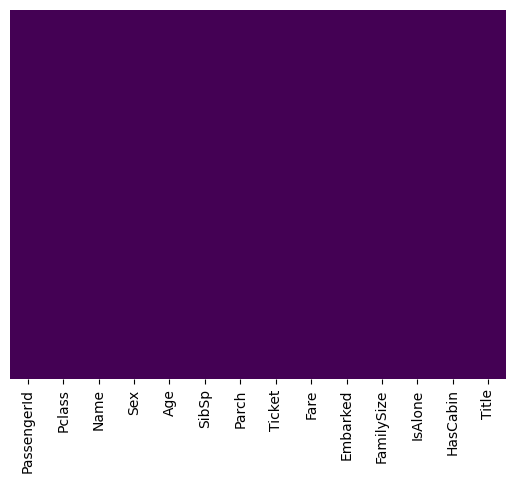

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,HasCabin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,0,Mr


In [24]:
df = pd.get_dummies(df,columns=["Sex","Embarked","Title"],drop_first=True)

In [25]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,HasCabin,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,0,True,False,True,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,0,1,False,False,False,False,False,True,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,False,False,True,True,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0,1,False,False,True,False,False,True,False
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,0,True,False,True,False,True,False,False


In [26]:
df = df.drop(columns=["Name","Ticket"])

In [27]:
df[["Sex_male","Embarked_Q","Embarked_S","Title_Miss","Title_Mr","Title_Mrs","Title_Rare"]]=df[["Sex_male","Embarked_Q","Embarked_S","Title_Miss","Title_Mr","Title_Mrs","Title_Rare"]].astype(int)

In [28]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())


In [29]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,HasCabin,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,3,22.0,1,0,7.2500,2,0,0,1,0,1,0,1,0,0
1,2,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0
2,3,3,26.0,0,0,7.9250,1,1,0,0,0,1,1,0,0,0
3,4,1,35.0,1,0,53.1000,2,0,1,0,0,1,0,0,1,0
4,5,3,35.0,0,0,8.0500,1,1,0,1,0,1,0,1,0,0


In [30]:
df = df.drop(columns="PassengerId")

#### Separating training and testing features

In [31]:
train_features = df.iloc[0:891]
test_features = df.iloc[891:]

In [32]:
train_output = train_df["Survived"]

#### Standardizing Features 

In [33]:
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
train_features=slr.fit_transform(train_features)
test_features = slr.fit_transform(test_features)

<p align="center">
<font size = "6"> Using Individual models </font>
</p>


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(train_features, train_output, test_size=0.2, random_state=42)

#### Using Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8324022346368715


#### Using KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(knn_pred,y_test))

Accuracy: 0.8156424581005587


#### Using SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm  = SVC(kernel="rbf",gamma=0.1)
svm.fit(X_train,y_train)

SVC(gamma=0.1)

In [47]:
svm_pred = svm.predict(X_test)
print("acc: ",accuracy_score(svm_pred,y_test))

acc:  0.8268156424581006


#### Using Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

#### Hyper parameter tuning using GridSearcCV

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid_params = {
    "n_estimators":[20,80,150,200,350],  
    "max_depth":[5,8,3],       
    "max_features" : [0.2,0.6,1.0],
    "max_samples" : [0.5,0.75,1.0]   
}

In [51]:
rf = RandomForestClassifier()

In [52]:
rf_grid = GridSearchCV(
    estimator = rf,
    param_grid= grid_params,
    cv = 5,
    verbose=2,
    n_jobs=-1
)

In [53]:
rf_grid.fit(train_features,train_output)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 3],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 80, 150, 200, 350]},
             verbose=2)

In [54]:
rf_grid.best_score_

np.float64(0.8394953235829513)

In [55]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 80}

In [56]:
rf = RandomForestClassifier(
    n_estimators=80,
    max_features=1,
    max_depth= 7,
    max_samples=0.75,
    bootstrap=True
)

In [57]:
rf.fit(X_train, y_train)
rand_pred = rf.predict(X_test)

In [58]:
rand_acc = accuracy_score(y_test,rand_pred)
print(f"Accuracy: {rand_acc}")

Accuracy: 0.8156424581005587


<p align="center">
<font size = "6"> Using Ensemble Technique </font>
</p>


#### Doing cross validation

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
ensem_svm = SVC(probability=True, kernel="rbf",gamma=.1)

In [60]:
estimators = [("lr",lr),("rf",rf),("knn",knn),("svm",ensem_svm)]

In [61]:
for estimator in estimators:
    score = cross_val_score(estimator[1],train_features,train_output,cv = 10, scoring= "accuracy")
    print(estimator[0], np.round(np.mean(score),4))

lr 0.8305
rf 0.8171
knn 0.8115
svm 0.8294


## Voting: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Logistic  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RandomForest  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;KNN   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SVM   

In [62]:
from sklearn.ensemble import VotingClassifier

#### soft voting

In [63]:
svc = VotingClassifier(estimators=estimators, voting= "soft")
score = cross_val_score(svc,train_features,train_output,cv = 10, scoring= "accuracy")
print("CV Accuracy: ", np.round(np.mean(score),4))

CV Accuracy:  0.8339


In [64]:
svc = VotingClassifier(estimators=estimators, voting= "soft")
score = cross_val_score(svc,train_features,train_output,cv = 10, scoring= "accuracy")
print("CV Accuracy: ", np.round(np.mean(score),4))

CV Accuracy:  0.8339


In [65]:
svc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=1,
                                                     max_samples=0.75,
                                                     n_estimators=80)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(gamma=0.1, probability=True))],
                 voting='soft')

In [66]:
prd = svc.predict(X_test)
print("Acc:",accuracy_score(y_test,prd))

Acc: 0.8212290502793296


#### hard voting

In [ ]:
#  Cross Validation

hvc = VotingClassifier(estimators=estimators, voting= "hard")
score = cross_val_score(hvc,train_features,train_output,cv = 10, scoring= "accuracy")
print("CV Accuracy: ", np.round(np.mean(score),4))

CV Accuracy:  0.8305


In [68]:
hvc.fit(X_train,y_train)
hvc_prd = hvc.predict(X_test)
print("Acc:",accuracy_score(y_test,hvc_prd))

Acc: 0.8212290502793296


## Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier

### Bagging using logistic regression

#### hyper parameter tuning for logistic regression

In [70]:
lr_bag = BaggingClassifier(
    estimator=LogisticRegression(random_state=42)   #declaring model
)

In [71]:
grid_params_lr = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 0.7, 1.0],
    "bootstrap": [True, False],
}


In [72]:
grid = GridSearchCV(
    estimator=lr_bag,
    param_grid=grid_params_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best params: {'bootstrap': True, 'max_samples': 0.5, 'n_estimators': 100}
Best CV accuracy: 0.8272136314389836


#### bagging using logistic regression

In [73]:
bag = BaggingClassifier(
    estimator= LogisticRegression(),
    n_estimators=50,
    max_samples=0.7,
    bootstrap=True,
    random_state=42
)
bag.fit(X_train,y_train)
lb_pred = bag.predict(X_test)
print("Bagging Logistic:",accuracy_score(y_test,lb_pred))

Bagging Logistic: 0.8324022346368715


#### bagging using KNN

In [74]:
KNN_bag = BaggingClassifier(
    estimator= KNeighborsClassifier(n_neighbors=3),
    n_estimators=50,
    max_samples=0.7,
    bootstrap=True,
    random_state=42
)
KNN_bag.fit(X_train,y_train)
KNN_pred = KNN_bag.predict(X_test)
print("Bagging Logistic:",accuracy_score(y_test,KNN_pred))

Bagging Logistic: 0.8379888268156425


#### bagging using svm

In [75]:
svm_bag = BaggingClassifier(
    estimator= SVC(probability=True, kernel="rbf",gamma=.1),
    n_estimators=50,
    max_samples=0.7,
    bootstrap=True,
    random_state=42
)
svm_bag.fit(X_train,y_train)
svm_pred = svm_bag.predict(X_test)
print("Bagging Logistic:",accuracy_score(y_test,svm_pred))

Bagging Logistic: 0.8268156424581006


<p align="center">
<font size = "6"> Voting Using All Bagging </font>
</p>


In [76]:
estimatorss = [("lr",bag),("rf",rf),("knn",KNN_bag),("svm",svm_bag)]
svcc = VotingClassifier(estimators=estimatorss, voting= "soft")
svcc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              BaggingClassifier(estimator=LogisticRegression(),
                                                max_samples=0.7,
                                                n_estimators=50,
                                                random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=1,
                                                     max_samples=0.75,
                                                     n_estimators=80)),
                             ('knn',
                              BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                                                max_samples=0.7,
                                                n_estimators=50,
                                                random_state=42)),
                             ('svm',
                              BaggingClassifier(estimator=SVC(gamma=0.1,
                                                              probability=True),
                                                max_samples=0.7,
                                                n_estimators=50,
                                                random_state=42))],
                 voting='soft')

In [77]:
bagged_vote_pred = svcc.predict(X_test)
print("ac:",accuracy_score(y_test,bagged_vote_pred))

ac: 0.8324022346368715


## Boosting

#### Adaboost -> Randomforest(default)

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
abc = AdaBoostClassifier(
    n_estimators= 400,
    learning_rate= 1
)
abc.fit(X_train,y_train)
ada_pred = abc.predict(X_test)
print("accuracy: ",accuracy_score(y_test,ada_pred))

accuracy:  0.8379888268156425


#### Adaboost -> Logistic Regression

In [80]:
abc_lr = AdaBoostClassifier(
    estimator=LogisticRegression(),
    n_estimators= 20,
    learning_rate= 0.5
)
abc_lr.fit(X_train,y_train)
ada_pred_lr = abc_lr.predict(X_test)
print("accuracy: ",accuracy_score(y_test,ada_pred_lr))

accuracy:  0.8268156424581006


### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gdb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate= 0.1,
    max_depth= 3,
    random_state=42
)

In [115]:
gdb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [116]:
gdb_pred = gdb.predict(X_test)
print("Acc: ",accuracy_score(gdb_pred,y_test))

Acc:  0.8435754189944135


### XGBoost

In [120]:
import xgboost as xgb

In [ ]:
#____________________________________________Hyper Parameter Tuning___________________________________________

from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


best_xgb = grid_search.best_estimator_
xgb_pred = best_xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, xgb_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV accuracy: 0.837043238451689
Test Accuracy: 0.8100558659217877


d:\conda_envs\myml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:43] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [127]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=3,
    random_state=42,
    eval_metric='logloss',
)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Accuracy: 0.8324022346368715


#### Dataset and Submission csv file for Kaggle Upload

In [ ]:
xgb_sub_pred = xgb_clf.predict(test_features)
submission_df = pd.DataFrame({
    "PassengerId": range(892, 1310),
    "Survived": xgb_sub_pred
})
# submission_df.to_csv(r"F:\\submissions\\titanic_xgboost2.csv", index=False)